In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df=pd.read_csv("C:/Users/MSI/Documents/Internship/national_illness.csv")
df_cleaned = df.dropna()
df_cleaned

,date,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
0,2002-01-01 00:00:00,1.222620,1.166680,582,805,2060,754,176569
1,2002-01-08 00:00:00,1.333440,1.216500,683,872,2267,785,186355
2,2002-01-15 00:00:00,1.319290,1.130570,642,878,2176,831,192469
3,2002-01-22 00:00:00,1.494840,1.252460,728,1045,2599,863,207512
4,2002-01-29 00:00:00,1.471950,1.302370,823,1189,2907,909,223208
...,...,...,...,...,...,...,...,...
961,2020-06-02 00:00:00,0.839059,0.846722,2756,3528,12913,3258,1525058
962,2020-06-09 00:00:00,0.895958,0.908885,3203,3778,13979,3254,1538038
963,2020-06-16 00:00:00,0.910926,0.941625,3478,3796,14389,3177,1528103
964,2020-06-23 00:00:00,0.946945,0.972185,3734,3818,14999,3066,1542813


In [52]:
df['date'] = pd.to_datetime(df['date'])

In [53]:
df.set_index('date',inplace=True)

In [54]:
df.describe()

,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,ILITOTAL,NUM. OF PROVIDERS,OT
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,9.660000e+02
mean,1.851286,1.845240,3434.813665,4981.128364,13540.716356,1608.261905,6.514975e+05
std,1.343042,1.309019,3153.962885,5953.881662,15010.894094,681.580042,3.490189e+05
min,0.351881,0.491507,98.000000,91.000000,318.000000,264.000000,6.469900e+04
25%,0.971185,0.978537,1487.000000,1667.500000,4915.000000,1238.000000,3.853698e+05
50%,1.375970,1.359065,2552.000000,3265.500000,9028.500000,1501.500000,6.183050e+05
75%,2.291583,2.223535,4457.750000,5673.500000,16243.750000,1990.000000,8.134695e+05
max,7.715100,7.780900,24097.000000,45513.000000,111361.000000,3453.000000,1.640587e+06


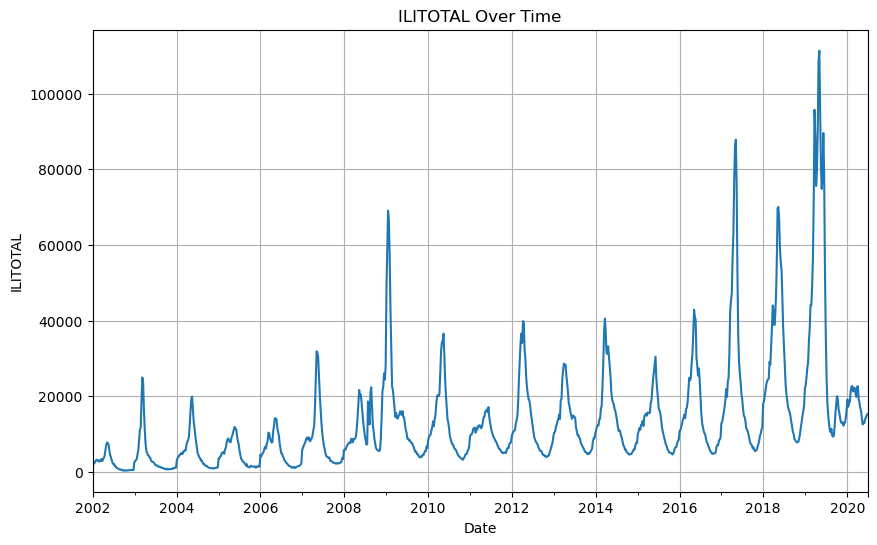

In [55]:
plt.figure(figsize=(10, 6))
df['ILITOTAL'].plot(marker='')
plt.xlabel('Date')
plt.ylabel('ILITOTAL')
plt.title('ILITOTAL Over Time')
plt.grid(True)
plt.show()


In [56]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test on the 'Temperature' column
result = adfuller(df['ILITOTAL'])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the test results
if p_value <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary')

ADF Statistic: -6.161281947965547
p-value: 7.163900092341713e-08
The time series is stationary.


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


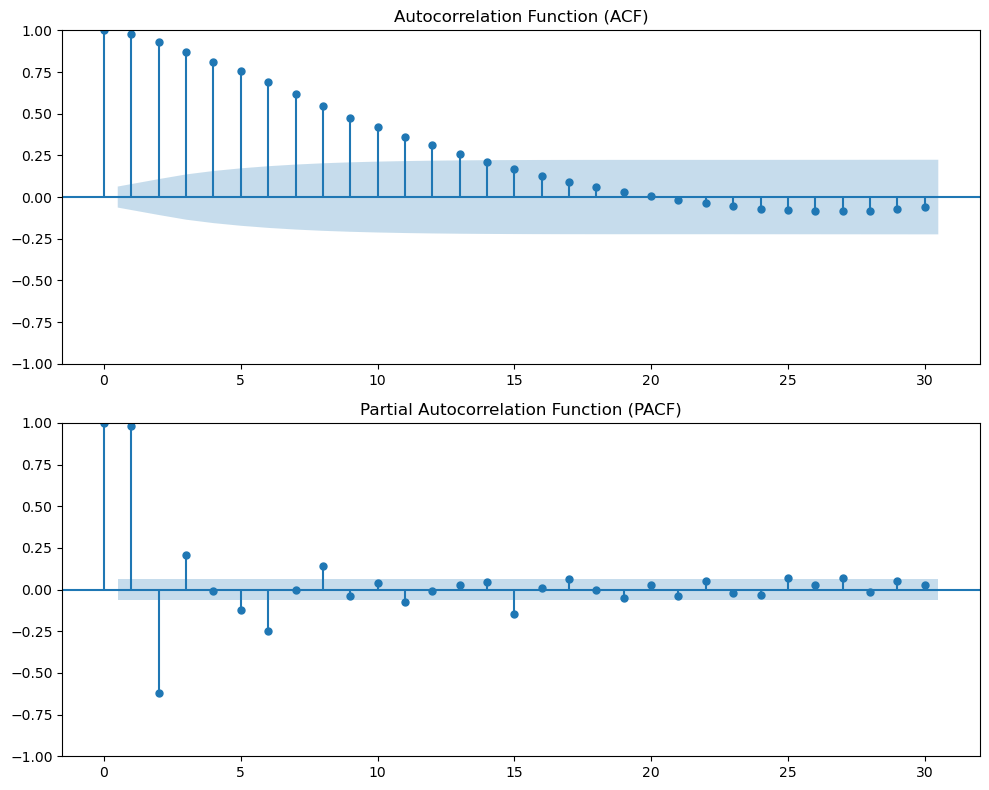

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# ACF plot
plot_acf(df['ILITOTAL'], ax=ax[0], lags=30)
ax[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(df['ILITOTAL'], ax=ax[1], lags=30)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [58]:
import pandas as pd
from pmdarima import auto_arima

time_series = df['ILITOTAL']  

# Use auto_arima to determine the optimal p, d, and q values
model = auto_arima(time_series, seasonal=False, trace=True)

# Print the selected model order (p, d, q)
print(f'ARIMA Model Order: ({model.order[0]}, {model.order[1]}, {model.order[2]})')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17865.112, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18314.297, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17916.381, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17943.495, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18312.315, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17878.270, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17875.029, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17821.387, Time=0.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=17875.785, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=17823.333, Time=1.01 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=17823.585, Time=1.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=17827.049, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=17861.915, Time=0.49 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=17820.749, Time=1.30 sec
 ARIMA(5,1,3)(0,0,0

In [59]:
print(df.shape)
train_data=df.iloc[:len(df)]
test_data=df.iloc[-30:]
print(train_data.shape,test_data.shape)

(966, 7)
(966, 7) (30, 7)


In [60]:
import statsmodels.api as sm

exog_variables = ['% WEIGHTED ILI','%UNWEIGHTED ILI','AGE 0-4','AGE 5-24','NUM. OF PROVIDERS','OT']  # Add your exogenous variables here
order = (5,1,2)  # (p, d, q) order for ARIMA component
seasonal_order = (5,1,2,12)  # (P, D, Q, S) order for seasonal component

In [61]:
model = sm.tsa.SARIMAX(train_data['ILITOTAL'], order=order, seasonal_order=seasonal_order, exog=train_data[exog_variables])
result = model.fit()

C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)


In [62]:
predictions = result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[exog_variables])
mse = np.mean((predictions - test_data['ILITOTAL'])**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((predictions - test_data['ILITOTAL']) / test_data['ILITOTAL'])) * 100

In [63]:
future_exog_variables = [
    '%WEIGHTED ILI',
    '%UNWEIGHTED ILI',
    'AGE 0-4',
    'AGE 5-24',
    'NUM. OF PROVIDERS',
    'OT'
]

forecast_steps = 10  # Replace '10' with the desired number of forecast steps

In [64]:
# Check for any missing values in the DataFrame
print(future_exog_df.isnull().sum())

%UNWEIGHTED ILI      10
AGE 0-4              10
AGE 5-24             10
NUM. OF PROVIDERS    10
dtype: int64


In [65]:
future_exog_df.dropna()

,%UNWEIGHTED ILI,AGE 0-4,AGE 5-24,NUM. OF PROVIDERS


In [66]:
 #Check for any missing values in the DataFrame
print(future_exog_df.isnull().sum())

%UNWEIGHTED ILI      10
AGE 0-4              10
AGE 5-24             10
NUM. OF PROVIDERS    10
dtype: int64


In [68]:
#Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
exog_test = test_data[exog_variables]

In [70]:
import statsmodels.api as sm
import numpy as np

exog_variables = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 5-24', 'NUM. OF PROVIDERS', 'OT']
order = (5, 1, 2)  # (p, d, q) order for ARIMA component
seasonal_order = (5, 1, 2, 12)  # (P, D, Q, S) order for seasonal component

model = sm.tsa.SARIMAX(train_data['ILITOTAL'], order=order, seasonal_order=seasonal_order, exog=train_data[exog_variables])
result = model.fit()

predictions = result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, exog=test_data[exog_variables])
mse = np.mean((predictions - test_data['ILITOTAL'])**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((predictions - test_data['ILITOTAL']) / test_data['ILITOTAL'])) * 100

forecast_demand_sarimax = result.get_forecast(steps=len(test_data), exog=exog_test)
predicted_mean = forecast_demand_sarimax.predicted_mean
print(predicted_mean)


C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-TUE will be used.
  self._init_dates(dates, freq)


2020-07-07    10817.487647
2020-07-14    11069.878134
2020-07-21    12605.504652
2020-07-28    13566.876926
2020-08-04    14917.319536
2020-08-11    13917.309490
2020-08-18    14982.289298
2020-08-25    14922.894128
2020-09-01    16639.301340
2020-09-08    17410.711038
2020-09-15    17298.429659
2020-09-22    14810.506157
2020-09-29    16027.503056
2020-10-06    15799.275212
2020-10-13    14704.396409
2020-10-20    12736.381667
2020-10-27    15099.745011
2020-11-03    16714.800461
2020-11-10    14939.566843
2020-11-17    14479.452257
2020-11-24    13697.826986
2020-12-01    13500.987929
2020-12-08    12752.809573
2020-12-15    11070.407770
2020-12-22    13013.946797
2020-12-29    13223.150534
2021-01-05    14469.156949
2021-01-12    14935.991218
2021-01-19    15817.516861
2021-01-26    16440.095917
Freq: W-TUE, Name: predicted_mean, dtype: float64


In [71]:
train_data_demand = train_data['ILITOTAL'].values
test_data_demand = test_data['ILITOTAL'].values

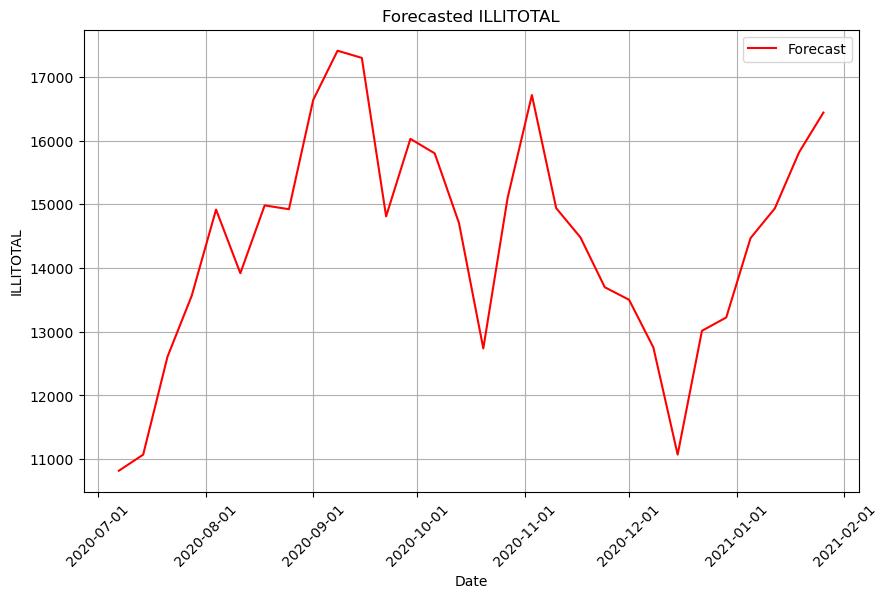

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Assuming you have already made the forecast and obtained the forecast_dates and predicted_values
# Get the forecasted dates and predicted values (y-hat) based on your method of forecasting
  # Replace with the forecasted dates
predicted_values = predicted_mean  # Replace with the predicted values (y-hat)
plt.figure(figsize=(10, 6))

# Plot the forecasted graph with red color and dashed line
plt.plot(predicted_values, label='Forecast', color='red', linestyle='-')

plt.xlabel('Date')
plt.ylabel('ILLITOTAL')
plt.title('Forecasted ILLITOTAL')
plt.legend()
plt.grid(True)

# Set the X-axis date locator and formatter to show only the first day of each month

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)
plt.show()

<Axes: >

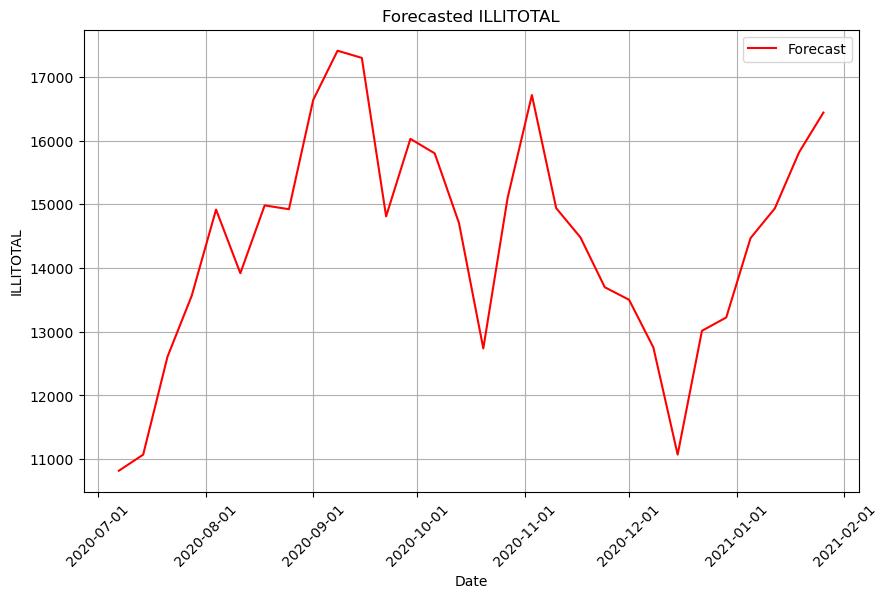

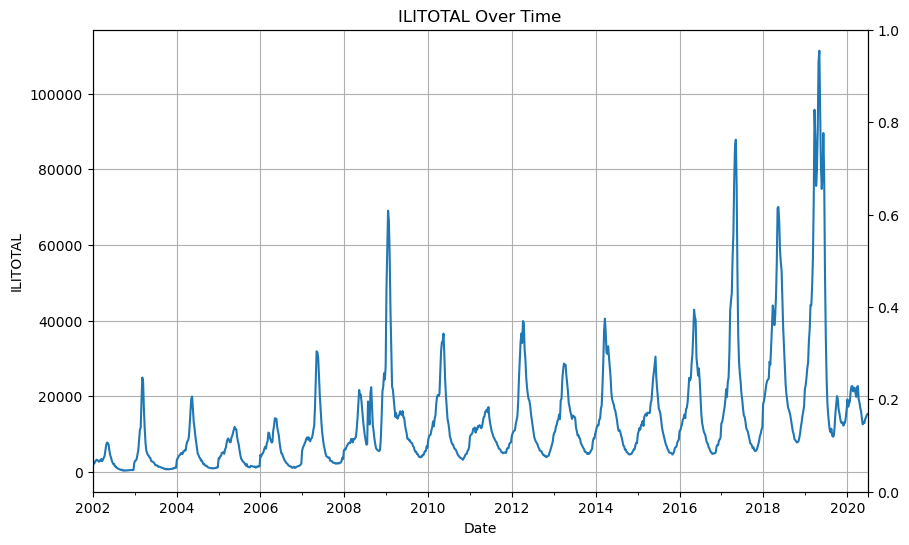

In [74]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Assuming you have already made the forecast and obtained the forecast_dates and predicted_values
# Get the forecasted dates and predicted values (y-hat) based on your method of forecasting
  # Replace with the forecasted dates
predicted_values = predicted_mean  # Replace with the predicted values (y-hat)
plt.figure(figsize=(10, 6))

# Plot the forecasted graph with red color and dashed line
plt.plot(predicted_values, label='Forecast', color='red', linestyle='-')


plt.xlabel('Date')
plt.ylabel('ILLITOTAL')
plt.title('Forecasted ILLITOTAL')
plt.legend()
plt.grid(True)



# Set the X-axis date locator and formatter to show only the first day of each month

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

plt.figure(figsize=(10, 6))
df['ILITOTAL'].plot(marker='')
plt.xlabel('Date')
plt.ylabel('ILITOTAL')
plt.title('ILITOTAL Over Time')
plt.grid(True)
plt.twinx()


    




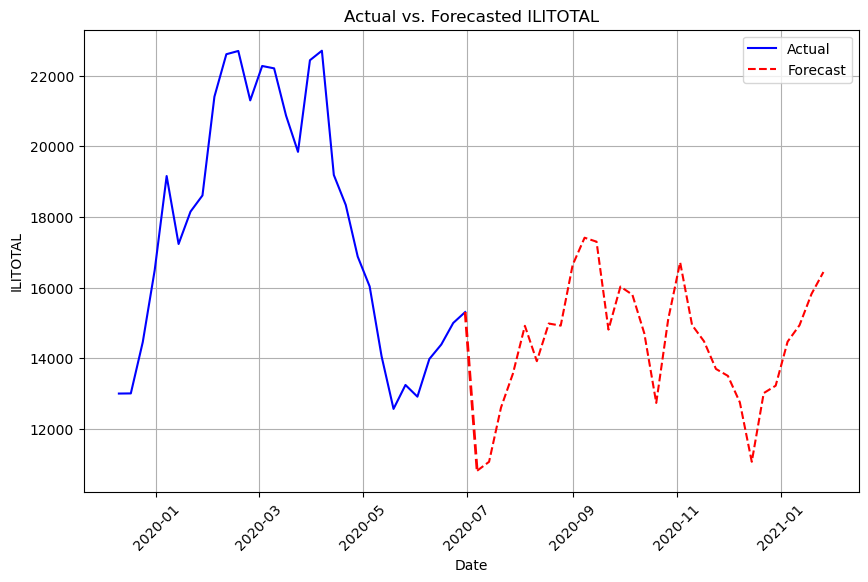

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the 'test_data' DataFrame and 'predicted_mean' Series from your code

plt.figure(figsize=(10, 6))

# Plot actual test data
plt.plot(test_data.index, test_data['ILITOTAL'], label='Actual', color='blue')

# Plot forecasted values
plt.plot(predicted_mean, label='Forecast', color='red', linestyle='--')

# Join lines between actual and forecasted values
plt.plot([test_data.index[-1], predicted_mean.index[0]], [test_data['ILITOTAL'].iloc[-1], predicted_mean.iloc[0]], color='red', linestyle='--', linewidth=2)

plt.xlabel('Date')
plt.ylabel('ILITOTAL')
plt.title('Actual vs. Forecasted ILITOTAL')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()
